In [1]:
path_to_pygkyl = '~/pygkyl_install/'
import sys
import os

# First reset the pygkyl library
!rm -rf ~/personal_gkyl_scripts/pygkyl/pygkyl.egg-info
!rm -rf ~/personal_gkyl_scripts/pygkyl/build
!{sys.executable} -m pip install ~/personal_gkyl_scripts/pygkyl > ~/personal_gkyl_scripts/pygkyl/install.log

import pygkyl

simdir = '/pscratch/sd/d/dliu2/main/gkylzero/output_3x2v_3/'
fileprefix = 'gk_bgk_im_asdex_3x2v_p1'

simulation = pygkyl.simulation_configs.import_config('aug', simdir, fileprefix)


simulation.normalization.set('t','mus') # time in micro-seconds
simulation.normalization.set('x','minor radius') # radial coordinate normalized by the minor radius (rho=r/a)
simulation.normalization.set('y','y/rho_i') # binormal in term of reference sound Larmor radius
simulation.normalization.set('ky','ky*rho_i') # binormal wavenumber in term of reference sound Larmor radius
simulation.normalization.set('z','pi') # parallel angle devided by pi
simulation.normalization.set('fluid velocities','thermal velocity') # fluid velocity moments are normalized by the thermal velocity
simulation.normalization.set('temperatures','eV') # temperatures in electron Volt
simulation.normalization.set('pressures','Pa') # pressures in Pascal
simulation.normalization.set('energies','MJ') # energies in mega Joules
simulation.normalization.set('current','kA') # currents in kA
simulation.normalization.set('gradients','major radius') # gradients are normalized by the major radius

# For printing the available normalizations
# simulation.normalization.info()

sim_frames = simulation.available_frames['field'] # you can check the available frames for each data type like ion_M0, ion_BiMaxwellian, etc.)
print("%g time frames available (%g to %g)"%(len(sim_frames),sim_frames[0],sim_frames[-1]))

  DEPRECATION: Building 'pygkyl' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pygkyl'. Discussion can be found at https://github.com/pypa/pip/issues/6334

        Available Normalizations:
        
        1. **Time Normalizations**:
        - 'mus': Microseconds (µs)
        - 'vti/R': Time normalized by ion thermal velocity over major radius (t v_{ti}/R)
        
        2. **Length Normalizations**:
        - 'rho' or 'minor radius': Normalized to the minor radius (ρ)
        - 'x/rho' or 'rho_L' or 'Larmor radius': Normalized to the Larmor radius (ρ_L)
        - 'R-Rlcfs' or 'LCFS shift' or 'LCFS': Shift relative to 
            the Last Closed Flux Surface (R - R_LCFS)
        
      

/global/homes/d/dliu2/.conda/envs/pgkyl/lib/python3.12/site-packages/pygkyl/classes/normalization.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  shift  = (self.simulation.geom_param.x_LCFS - self.simulation.geom_param.a_mid) / scale


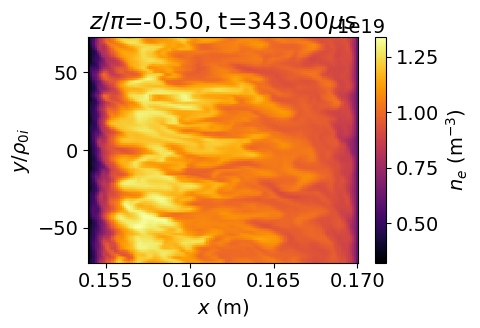

In [2]:
cut_dir = 'xy' # the plane we want to plot
cut_coord = -0.5 # the coordinate were the plan stands If normalized units are defined, 
# this number is in the normalize units. One can also specify a integer for array index 
# or 'avg' to get an average over the reduced dim.
time_frame = sim_frames[-1] # the time frame
fieldnames = ['ne'] # the fields to plot, see simulation.display_available_fields() (some may not work in 2x2v)
pygkyl.plot_utils.plot_2D_cut(simulation, cut_dir, cut_coord, time_frame,fieldnames,plot_type='pcolormesh')

In [3]:
polproj = pygkyl.PoloidalProjection()
polproj.setup(simulation,nzInterp=64)

Shape of alpha: (128, 3072)


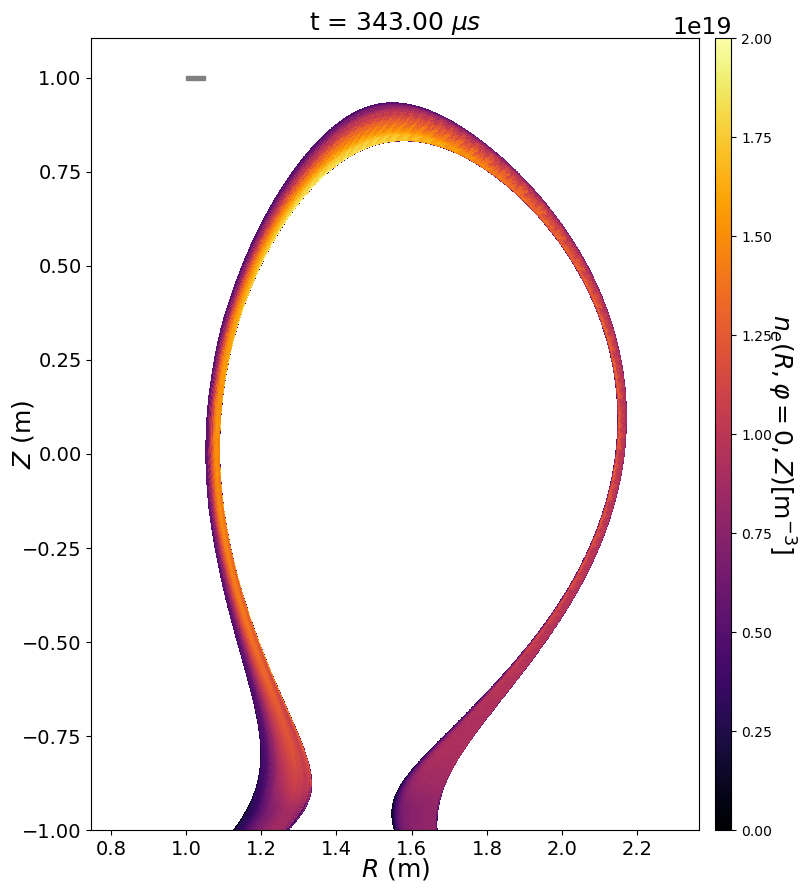

In [4]:
polproj.plot('ne', timeFrame=sim_frames[-1], colorScale='linear', inset=False, clim=[0.0, 2.0e19])
#polproj.plot('ne', timeFrame=sim_frames[340], xlim=[2.12, 2.18], ylim=[-0.05, 0.05], colorScale='linear', clim=[0.0, 1.5e19])
#polproj.plot('ne', timeFrame=sim_frames[340], xlim=[1.5, 1.6], ylim=[0.75, 0.95], colorScale='linear', clim=[0.0, 2.2e19])

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


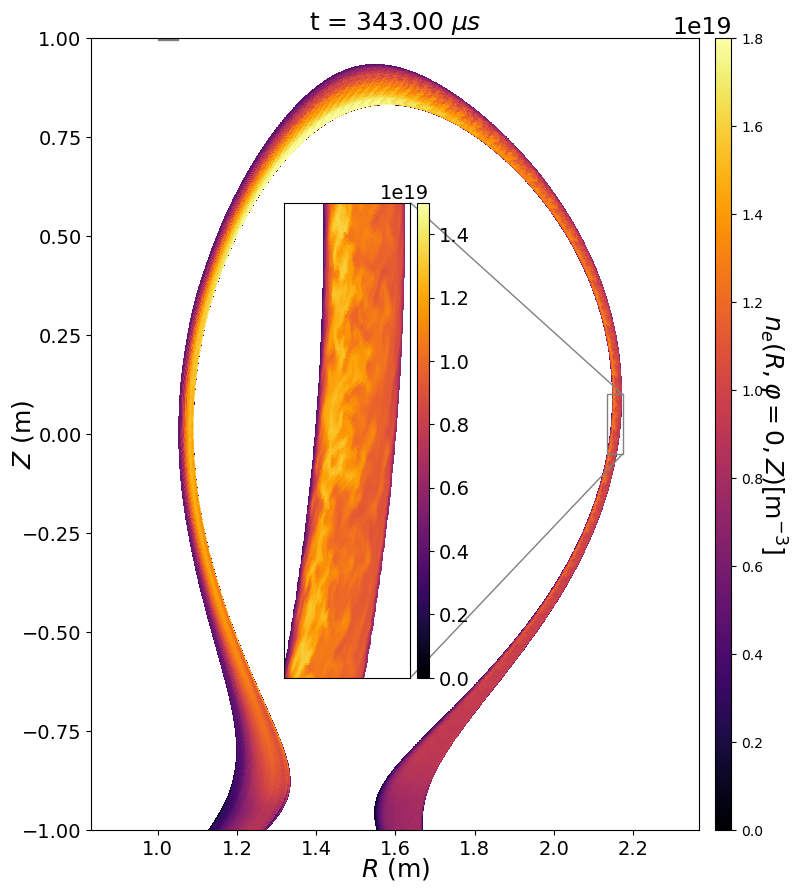

In [6]:
polproj.inset.zoom = 8 # adjust the zoom of the inset
polproj.inset.xlim = [2.134,2.174] # set the x-axis limits of the inset
polproj.inset.ylim = [-0.05,0.10] # set the y-axis limits of the inset
polproj.inset.markLoc = [1,4] # provide the corner to mark the inset (1 up R, 2 up L, 3 low L, 4 low R)
polproj.inset.lowerCornerRelPos = (0.3, 0.18) # set the relative position of the inset on the main plot
xlim=[1.0, 2.2]
ylim=[-1.0, 1.0]
clim = [0.0,1.8e19]
climInset = [0.0,1.5e19]
polproj.plot('ne',timeFrame=sim_frames[-1],inset=True,xlim=xlim,ylim=ylim,clim=clim,climInset=climInset)
polproj.reset_inset() # reset the inset to the default values

In [7]:
polproj.inset.zoom = 8 # adjust the zoom of the inset
polproj.inset.xlim = [2.134,2.174] # set the x-axis limits of the inset
polproj.inset.ylim = [-0.05,0.10] # set the y-axis limits of the inset
polproj.inset.markLoc = [1,4] # provide the corner to mark the inset (1 up R, 2 up L, 3 low L, 4 low R)
polproj.inset.lowerCornerRelPos = (0.3, 0.18) # set the relative position of the inset on the main plot
xlim=[1.0, 2.2]
ylim=[-1.0, 1.0]
clim = [0.0,1.8e19]
climInset = [0.0,1.5e19]
polproj.movie('ne',moviePrefix='gallery/mov_example_',timeFrames=sim_frames[-44:],colorScale='linear',
              xlim=xlim,ylim=ylim,clim=clim,climInset=climInset)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 1/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 2/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 3/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 4/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 5/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 6/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 7/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 8/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 9/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 10/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 11/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 12/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 13/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 14/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 15/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 16/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 17/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 18/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 19/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 20/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 21/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 22/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 23/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 24/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 25/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 26/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 27/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 28/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 29/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 30/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 31/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 32/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 33/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 34/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 35/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 36/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 37/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 38/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 39/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 40/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 41/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 42/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 43/44... 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Processing frames: 44/44... 
Creating movie gallery/mov_example_ne_RZ_xlim_01_02_ylim_-01_01.gif...
movie gallery/mov_example_ne_RZ_xlim_01_02_ylim_-01_01.gif created.
